# Group 1 - Final Project
## Spotify Tracks

This project uses Spotify Tracks data -> https://huggingface.co/datasets/maharshipandya/spotify-tracks-dataset?library=datasets 

### Project Steps:
* Import necessary libraries/modules
* Load the dataset
* Data cleaning and preparation
* Explorative data analysis
* Data pre-processing
* Build 5 Machine Learning models
  - 1 ensemble
  - 1 deep learning
* Improve the models with hyperparameter tunings
* Compare models
  

### Import necessary libraries/modules

In [21]:
# (run this once)
# Install the Hugging Face datasets library 
!pip install datasets
# Import the dataset
from datasets import load_dataset

# for what?
import pandas as pd

# for what?
import matplotlib.pyplot as plt


Matplotlib is building the font cache; this may take a moment.


### Load the dataset 

In [9]:
# Load the dataset
ds = load_dataset("maharshipandya/spotify-tracks-dataset")

# Convert to pandas DataFrame to use .head()
df = ds['train'].to_pandas()

In [6]:
# Display the first few rows
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


### Data cleaning and preparation

In [17]:
# 1. Remove exact duplicates based on 'track_id'
df_clean = df.drop_duplicates(subset='track_id').copy()
print("=== Missing values per column before filling ===")
print(df_clean.isnull().sum())
print()

# 2. Handle missing values
numeric_cols = ['popularity', 'duration_ms', 'danceability', 'energy',
                'loudness', 'speechiness', 'acousticness',
                'instrumentalness', 'liveness', 'valence', 'tempo']

# Fill numeric NaNs with median
df_clean[numeric_cols] = df_clean[numeric_cols].fillna(df_clean[numeric_cols].median())

# Fill categorical NaNs with a placeholder
for col in ['track_genre', 'artists', 'album_name', 'track_name']:
    df_clean[col] = df_clean[col].fillna('Unknown')

# 3. Type conversions / boolean encoding
df_clean['explicit'] = df_clean['explicit'].astype(int)
df_clean[['mode','key','time_signature']] = df_clean[['mode','key','time_signature']].astype(int)

# 4. Feature engineering
# Convert duration to minutes
df_clean['duration_min'] = df_clean['duration_ms'] / 60000

# Count number of artists per track
df_clean['num_artists'] = df_clean['artists'].str.split(';').apply(len)

# 5. Encode categorical variables
df_clean['genre_encoded'] = pd.factorize(df_clean['track_genre'])[0]

# 6. Handle outliers
# Cap track duration at the 99th percentile
dur_cap = df_clean['duration_min'].quantile(0.99)
df_clean['duration_min_capped'] = df_clean['duration_min'].clip(upper=dur_cap)

# 7. Reset index
df_clean = df_clean.reset_index(drop=True)

# Display cleaned DataFrame info and first rows
print("=== Cleaned DataFrame Info ===")
df_clean.info()
print()

print("\n=== Sample of Cleaned Data ===")
df_clean.head()

=== Missing values per column before filling ===
Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

=== Cleaned DataFrame Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89741 entries, 0 to 89740
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           89741 non-null  int64  
 1   track_id             89741 non-null  object 
 2   artists              89741 non-null  object 
 3   album_name           89741 non-null  object 
 4   track_name           89741 non

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_min,num_artists,genre_encoded,duration_min_capped
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,0,0.676,0.4610,...,0.000001,0.3580,0.715,87.917,4,acoustic,3.844433,1,0,3.844433
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,0,0.420,0.1660,...,0.000006,0.1010,0.267,77.489,4,acoustic,2.493500,1,0,2.493500
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,0,0.438,0.3590,...,0.000000,0.1170,0.120,76.332,4,acoustic,3.513767,2,0,3.513767
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,0,0.266,0.0596,...,0.000071,0.1320,0.143,181.740,3,acoustic,3.365550,1,0,3.365550
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,0,0.618,0.4430,...,0.000000,0.0829,0.167,119.949,4,acoustic,3.314217,1,0,3.314217


### Explorative data analysis

#### Numeric overview

In [28]:
df_clean[numeric_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
popularity,89741.0,33.198438,20.580824,0.000,19.0000,33.000000,49.0000,100.000
duration_ms,89741.0,229141.812182,112947.741190,0.000,173040.0000,213293.000000,264293.0000,5237295.000
danceability,89741.0,0.562166,0.176691,0.000,0.4500,0.576000,0.6920,0.985
energy,89741.0,0.634458,0.256605,0.000,0.4570,0.676000,0.8530,1.000
loudness,89741.0,-8.499004,5.221490,-49.531,-10.3220,-7.185000,-5.1080,4.532
speechiness,89741.0,0.087442,0.113277,0.000,0.0360,0.048900,0.0859,0.965
acousticness,89741.0,0.328289,0.338321,0.000,0.0171,0.188000,0.6250,0.996
instrumentalness,89741.0,0.173413,0.323848,0.000,0.0000,0.000058,0.0976,1.000
liveness,89741.0,0.216970,0.194884,0.000,0.0982,0.132000,0.2790,1.000
valence,89741.0,0.469477,0.262864,0.000,0.2490,0.457000,0.6820,0.995


#### Univariate Distributions (Histograms & Boxplots)

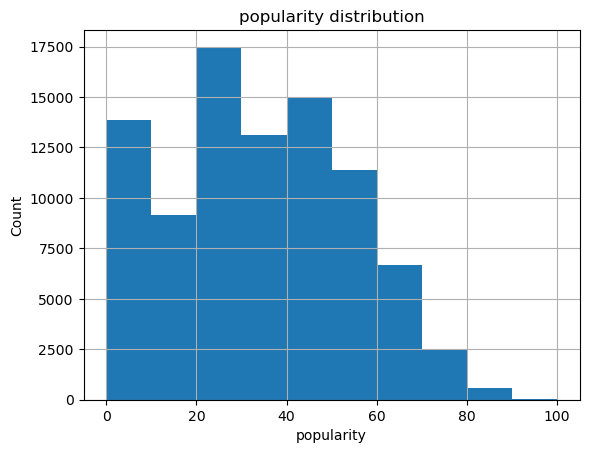

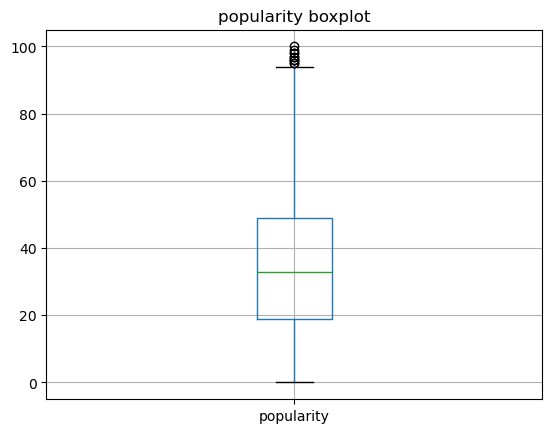

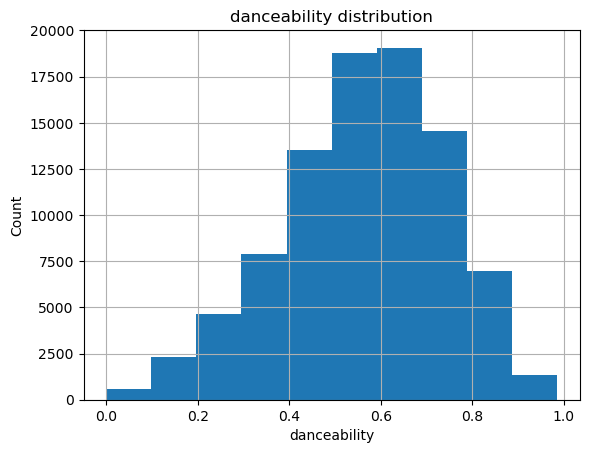

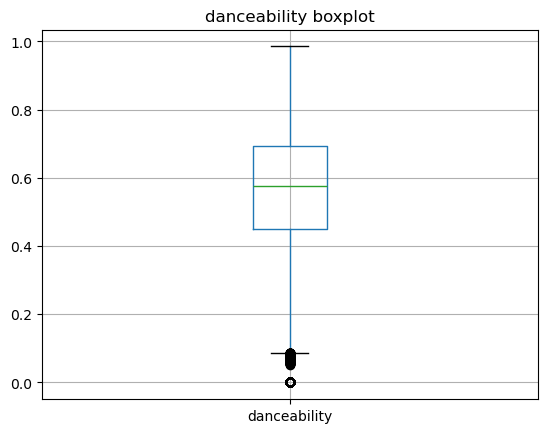

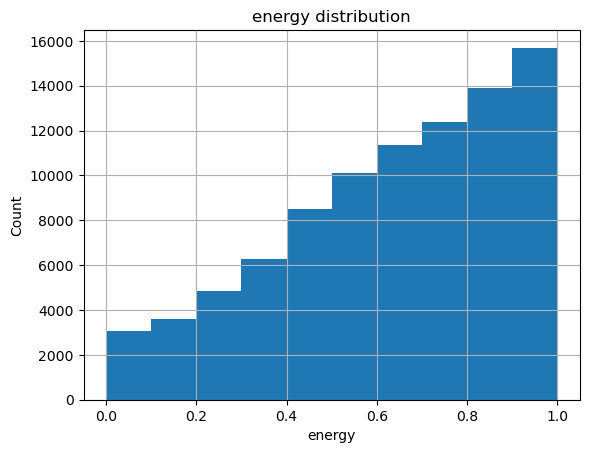

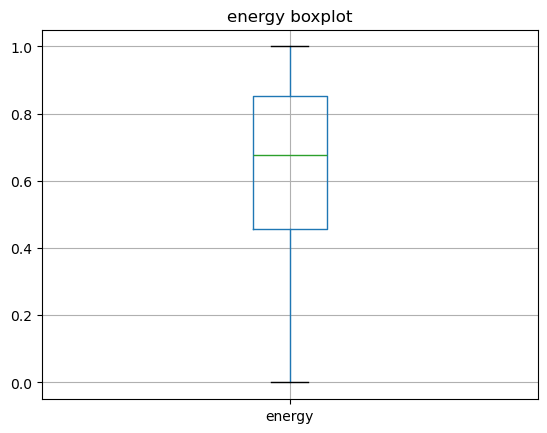

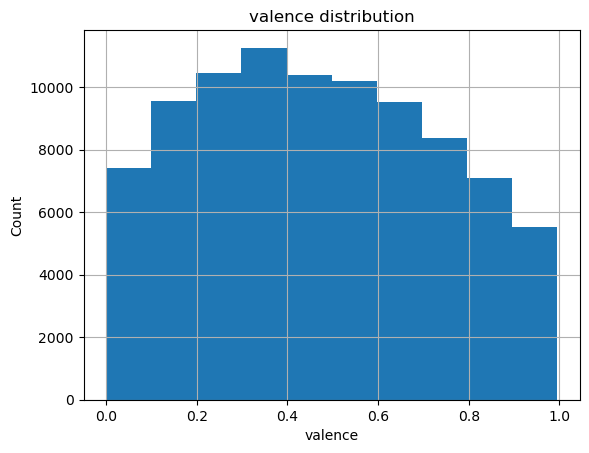

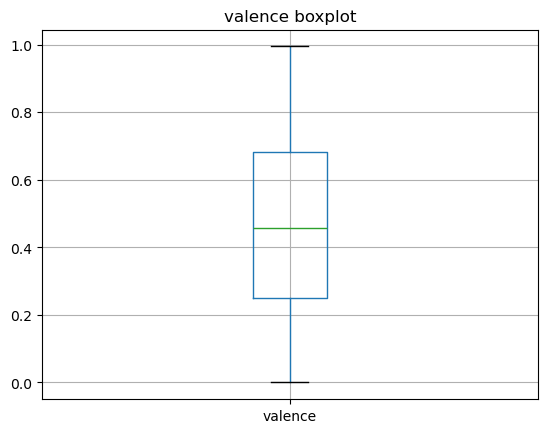

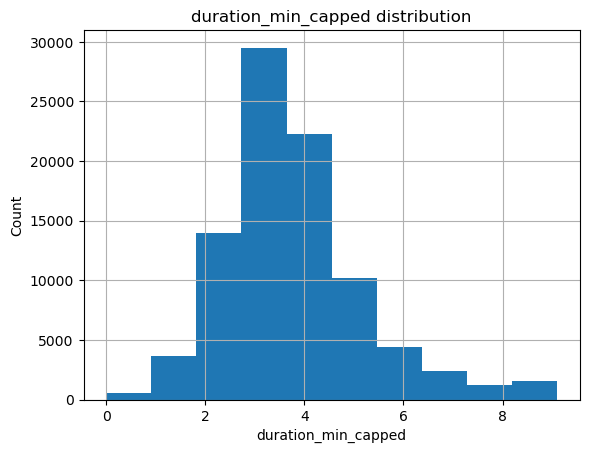

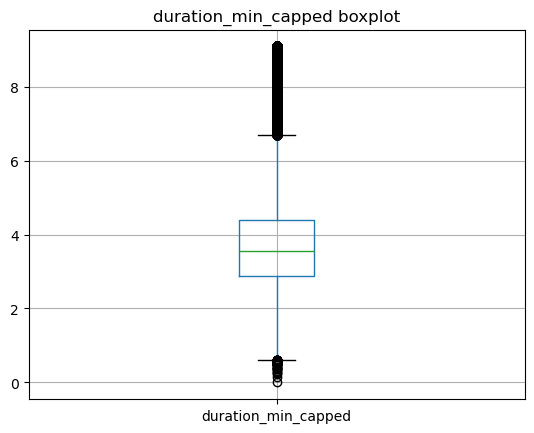

In [23]:
# Plotting histograms for, say, popularity, danceability, energy, valence, duration_min_capped 
# shows you skew, multi-modality, and where to watch out for outliers.
# Boxplots highlight extreme values you might want to cap or treat specially.

for col in ['popularity','danceability','energy','valence','duration_min_capped']:
    plt.figure()
    df_clean[col].hist()
    plt.title(f"{col} distribution")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

    plt.figure()
    df_clean.boxplot(column=col)
    plt.title(f"{col} boxplot")
    plt.show()

#### Bar Charts

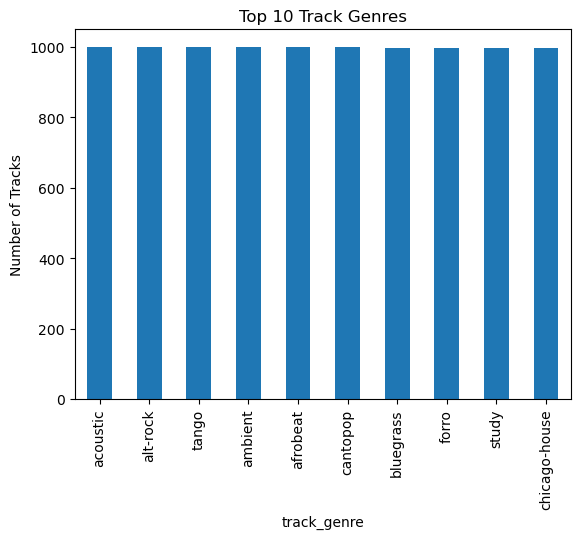

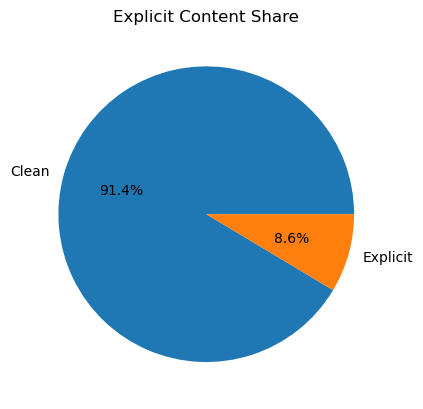

In [31]:
# For track_genre, explicit, mode, key, and time_signature, bar charts 
# show you which genres dominate, how common explicit content is
# and the most frequent musical keys or time signatures.

# Top 10 genres
genre_counts = df_clean['track_genre'].value_counts().nlargest(10)
genre_counts.plot.bar()
plt.title("Top 10 Track Genres")
plt.ylabel("Number of Tracks")
plt.show()

# Explicit vs non-explicit
df_clean['explicit'].value_counts().plot.pie(
    autopct='%1.1f%%', labels=['Clean','Explicit'], legend=False)
plt.title("Explicit Content Share")
plt.ylabel("")
plt.show()

#### Correlation Matrix

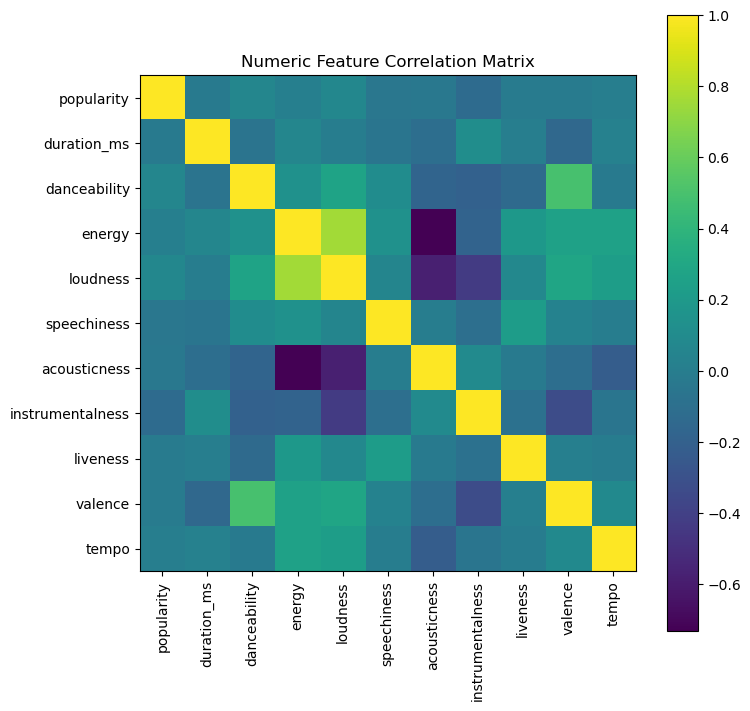

In [32]:
# A numeric correlation matrix reveals which musical attributes move together 
# (e.g. energy ↔ loudness, danceability ↔ tempo), guiding feature selection or engineering.

corr = df_clean[numeric_cols].corr()
plt.figure(figsize=(8,8))
plt.imshow(corr, interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=90)
plt.yticks(range(len(numeric_cols)), numeric_cols)
plt.title("Numeric Feature Correlation Matrix")
plt.show()

#### Scatter / Pairwise Plots

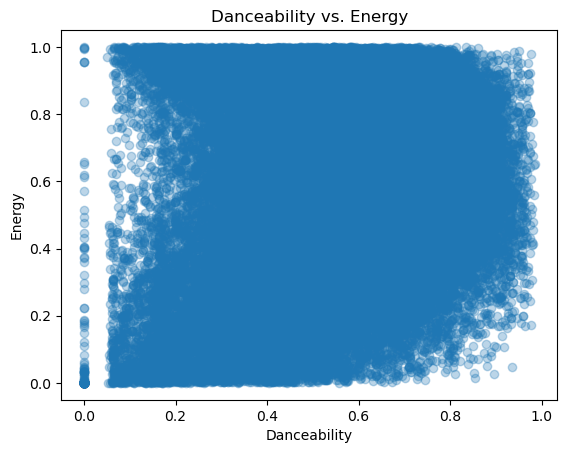

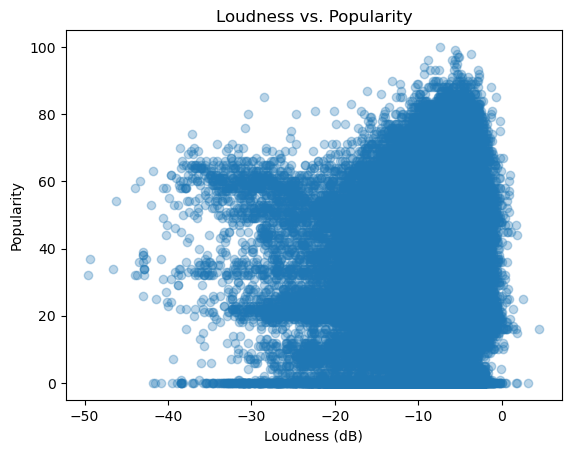

In [35]:
# Dig deeper into interesting correlations by plotting pairs.
# For example, danceability vs. energy might cluster by genre or popularity.
plt.figure()
plt.scatter(df_clean['danceability'], df_clean['energy'], alpha=0.3)
plt.xlabel("Danceability")
plt.ylabel("Energy")
plt.title("Danceability vs. Energy")
plt.show()

# Likewise: popularity vs. loudness
plt.figure()
plt.scatter(df_clean['loudness'], df_clean['popularity'], alpha=0.3)
plt.xlabel("Loudness (dB)")
plt.ylabel("Popularity")
plt.title("Loudness vs. Popularity")
plt.show()